In [1]:
import pandas as pd
import numpy as np

In [2]:
news_path = '/content/drive/MyDrive/fakenews/BuzzFeedNews.txt'
user_path = '/content/drive/MyDrive/fakenews/BuzzFeedUser.txt'
news_user_path = '/content/drive/MyDrive/fakenews/BuzzFeedNewsUser.txt'
user_user_path = '/content/drive/MyDrive/fakenews/BuzzFeedUserUser.txt'

In [3]:
news = pd.read_csv(news_path,header=None)
user = pd.read_csv(user_path,header=None)
news_user = pd.read_csv(news_user_path,sep='\t',header=None)
user_user = pd.read_csv(user_user_path,sep='\t',header=None)

In [4]:
news.columns = ['news']
news['news_node'] = ['news'+str(i) for i in list(news.index+1)]
news

,news,news_node
0,BuzzFeed_Real_1,news1
1,BuzzFeed_Real_2,news2
2,BuzzFeed_Real_3,news3
3,BuzzFeed_Real_4,news4
4,BuzzFeed_Real_5,news5
...,...,...
177,BuzzFeed_Fake_87,news178
178,BuzzFeed_Fake_88,news179
179,BuzzFeed_Fake_89,news180
180,BuzzFeed_Fake_90,news181


In [5]:
user.columns = ['user']
user['user_node']=['user'+str(i) for i in list(user.index+1)]
user

,user,user_node
0,98d2b98ce305174e2f6c10b8f8a1a9d5,user1
1,a273d0fd07c18a884ce2aa425813eb06,user2
2,ac091e92df9e854a07563ffb397925d4,user3
3,d2ded2de054f2ceb43dff7f80fc46774,user4
4,3f2b23abf0e842f6bc97eed85596ff50,user5
...,...,...
15252,181082a5374a323a17c208a87c5e0418,user15253
15253,84170990ec4dfd4a29df1fc6e4ba6b97,user15254
15254,5d47a2477f7963484463d0020e7d6d21,user15255
15255,fd2441ac470068419ce32248b2f478f0,user15256


In [6]:
news_user.columns = ['news_node','user_node','retweet']
news_user['news_node']=['news'+str(i) for i in list(news_user['news_node'])]
news_user['user_node']=['user'+str(i) for i in list(news_user['user_node'])]
news_user

,news_node,user_node,retweet
0,news45,user1,1
1,news127,user2,1
2,news115,user3,1
3,news180,user3,1
4,news140,user4,1
...,...,...,...
22774,news150,user15257,1
22775,news151,user15257,1
22776,news152,user15257,1
22777,news155,user15257,1


In [7]:
user_user.columns = ['follower','following']
user_user['follower']=['user'+str(i) for i in list(user_user['follower'])]
user_user['following']=['user'+str(i) for i in list(user_user['following'])]
user_user

,follower,following
0,user48,user1
1,user899,user1
2,user6781,user1
3,user10097,user1
4,user100,user2
...,...,...
634745,user6636,user15257
634746,user8135,user15257
634747,user9125,user15257
634748,user10714,user15257


In [8]:
edge_list = []
for i,j in zip(list(user_user['follower']),list(user_user['following'])):
  edge_list.append((i,j))
edge_list

[('user48', 'user1'),
 ('user899', 'user1'),
 ('user6781', 'user1'),
 ('user10097', 'user1'),
 ('user100', 'user2'),
 ('user199', 'user2'),
 ('user410', 'user2'),
 ('user621', 'user2'),
 ('user664', 'user2'),
 ('user1112', 'user2'),
 ('user1375', 'user2'),
 ('user1432', 'user2'),
 ('user1506', 'user2'),
 ('user1764', 'user2'),
 ('user1813', 'user2'),
 ('user2025', 'user2'),
 ('user2244', 'user2'),
 ('user2745', 'user2'),
 ('user2799', 'user2'),
 ('user3064', 'user2'),
 ('user3180', 'user2'),
 ('user3333', 'user2'),
 ('user3408', 'user2'),
 ('user3436', 'user2'),
 ('user3644', 'user2'),
 ('user3804', 'user2'),
 ('user3843', 'user2'),
 ('user4049', 'user2'),
 ('user4544', 'user2'),
 ('user4654', 'user2'),
 ('user4956', 'user2'),
 ('user4983', 'user2'),
 ('user5015', 'user2'),
 ('user5842', 'user2'),
 ('user5881', 'user2'),
 ('user5939', 'user2'),
 ('user6113', 'user2'),
 ('user6413', 'user2'),
 ('user6712', 'user2'),
 ('user6754', 'user2'),
 ('user7064', 'user2'),
 ('user7242', 'user2'),

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
D = nx.DiGraph()

In [11]:
D.add_nodes_from(list(news['news_node']))

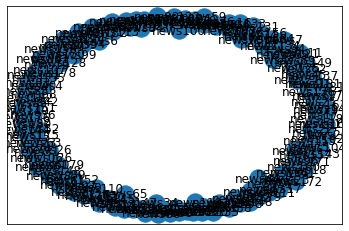

In [12]:
nx.draw_networkx(D)

In [13]:
D.add_nodes_from(list(user['user_node']))

In [14]:
D = nx.from_pandas_edgelist(user_user,source='follower',target='following')

In [15]:
D = nx.from_pandas_edgelist(news_user,source='user_node',target='news_node',edge_attr='retweet')

In [ ]:
plt.figure(figsize=(100,100))
pos = nx.spring_layout(G,k=0.05)
nx.draw_networkx_nodes(G,pos,nodelist=list(news['news_node']),node_color='r',node_size=10)
nx.draw_networkx_nodes(G,pos,nodelist=list(user['user_node']),node_color='b',node_size=5)
nx.draw_networkx(G)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
G_user = nx.DiGraph()

In [17]:
G_user.add_nodes_from(list(user['user_node']))

In [18]:
G_user.add_edges_from(edge_list)

In [43]:
plt.figure(figsize=(100,100))
nx.draw_networkx(G_user)

In [19]:
InDegree = dict(G_user.in_degree())
InDegree['user2']

87

In [20]:
OutDegree = dict(G_user.out_degree())
OutDegree['user2']

68

In [21]:
coef = dict(nx.clustering(G_user))
coef['user1']

0.25

In [22]:
InDegree['user1559']/(InDegree['user1559']+OutDegree['user1559'])

0.6666666666666666

In [23]:
news1=news_user.loc[news_user['news_node']=='news1',:]
news1

,news_node,user_node,retweet
566,news1,user409,1
4848,news1,user3185,1
5317,news1,user3519,1
8043,news1,user5320,1
10688,news1,user7040,1
10947,news1,user7194,1
12974,news1,user8597,1
15123,news1,user10043,1
15573,news1,user10351,1
17356,news1,user11539,1


In [24]:
news1_user = list(news1['user_node'])
news1_user_retweet = list(news1['retweet'])
coef_score_sum = []
for i,j in zip(news1_user,news1_user_retweet):
  coef_score_sum.append(coef[i]*j)
print(np.sum(coef_score_sum)/len(coef_score_sum))

0.17849260553673846


In [25]:
news1_user = list(news1['user_node'])
news1_user_retweet = list(news1['retweet'])
degree_score_sum = []
for i,j in zip(news1_user,news1_user_retweet):
  degree_score_sum.append((InDegree[i]/(InDegree[i]+OutDegree[i]))*j)
print(degree_score_sum)
print(np.sum(degree_score_sum)/len(degree_score_sum))

[1.0, 0.8571428571428571, 0.49002217294900224, 0.7482993197278912, 1.0, 0.6666666666666666, 0.5714285714285714, 0.564935064935065, 1.0, 1.0, 0.5446009389671361, 0.7777777777777778, 0.75]
0.766990259199613


In [26]:
news2=news_user.loc[news_user['news_node']=='news2',:]
news2

,news_node,user_node,retweet
271,news2,user190,1
273,news2,user192,1
594,news2,user429,1
727,news2,user532,1
1046,news2,user735,1
1218,news2,user853,2
2044,news2,user1413,1
2257,news2,user1546,1
2295,news2,user1559,2
2329,news2,user1583,1


In [27]:
news2_user = list(news2['user_node'])
news2_user_retweet = list(news2['retweet'])
coef_score_sum = []
for i,j in zip(news2_user,news2_user_retweet):
  coef_score_sum.append(coef[i]*j)
print(np.sum(coef_score_sum)/len(coef_score_sum))

0.08210477096605666


In [28]:
news2_user = list(news2['user_node'])
news2_user_retweet = list(news2['retweet'])
degree_score_sum = []
for i,j in zip(news2_user,news2_user_retweet):
  degree_score_sum.append((InDegree[i]/(InDegree[i]+OutDegree[i]))*j)
print(degree_score_sum)
print(np.sum(degree_score_sum)/len(degree_score_sum))

[0.9736842105263158, 0.5102040816326531, 1.0, 0.631578947368421, 1.0, 2.0, 0.4583333333333333, 1.0, 1.3333333333333333, 0.5, 1.0, 1.0, 0.7297297297297297, 0.7068965517241379, 0.5, 0.5121951219512195, 0.5655737704918032, 1.0, 0.5, 0.3333333333333333, 0.0, 1.1304347826086956, 0.8611111111111112, 0.5405405405405406, 0.375, 0.3125, 0.9523809523809523, 0.6519607843137255, 0.7619047619047619, 0.5244444444444445, 3.5555555555555554, 0.6666666666666666, 0.5076923076923077, 0.717391304347826, 1.0, 0.29411764705882354, 0.5, 0.8333333333333334, 0.8529411764705882, 0.8983050847457628, 0.4797297297297297, 1.0, 1.0, 0.5555555555555556, 0.5377358490566038, 0.37664233576642336, 0.5, 2.0, 0.7, 0.47058823529411764, 0.8888888888888888, 0.7532467532467533]
0.797183273348797


In [29]:
coef_score=[]
for i in list(news['news_node']):
  news_i = news_user.loc[news_user['news_node']==i,:]
  news_user_i = list(news_i['user_node'])
  news_user_i_retweet_ = list(news_i['retweet'])
  coef_score_sum = []
  for j,k in zip(news_user_i,news_user_i_retweet_):
    coef_score_sum.append(coef[j]*k)
  coef_score.append(np.sum(coef_score_sum)/len(coef_score_sum))
coef_score

[0.17849260553673846,
 0.08210477096605666,
 0.10904827805269955,
 0.24584237802179984,
 0.1124697470836083,
 0.13967128774530868,
 0.12788177064186457,
 0.18731438201079725,
 0.10402086358865535,
 0.12027458471610092,
 0.10316622282602447,
 0.1230359969686592,
 0.1092965418581931,
 0.1182531973330539,
 0.12135315581336324,
 0.145215826214907,
 0.15857879209592646,
 0.10401299798932026,
 0.16014870593865982,
 0.1660474923132816,
 0.11721238027641011,
 0.14869916819463605,
 0.1257641245975549,
 0.3156545889422601,
 0.06988288182346786,
 0.09069118722683622,
 0.11381487155341181,
 0.084929015300328,
 0.11697376437834132,
 0.10557683922653224,
 0.11821636826726807,
 0.1252270197852961,
 0.08322114698428419,
 0.11347162901057282,
 0.1188344152014933,
 0.1111375592909864,
 0.0957224537674467,
 0.13485212230818344,
 0.025543355617613044,
 0.16983004982043118,
 0.11763901743495375,
 0.13248186991797345,
 0.09003836648857955,
 0.1334102194598203,
 0.13554426106691958,
 0.1245063317444115,
 0.1

In [30]:
degree_score=[]
for i in list(news['news_node']):
  news_i = news_user.loc[news_user['news_node']==i,:]
  news_user_i = list(news_i['user_node'])
  news_user_i_retweet_ = list(news_i['retweet'])
  degree_score_sum = []
  for j,k in zip(news_user_i,news_user_i_retweet_):
    degree_score_sum.append((InDegree[j]/(InDegree[j]+OutDegree[j]))*k)
  degree_score.append(np.sum(degree_score_sum)/len(degree_score_sum))
degree_score

[0.766990259199613,
 0.797183273348797,
 0.6491097504528321,
 1.2253736747758452,
 0.6763020594514042,
 0.7554589739704834,
 0.7221976585385894,
 0.7932781210687142,
 0.7254557732961437,
 0.7667042577071318,
 0.7699223019950991,
 0.7590402885519909,
 0.6970259245007149,
 0.826058649107796,
 0.796772750283855,
 0.7451734291241854,
 0.8785673924752231,
 0.6931011091115558,
 0.7405416903134481,
 0.8011889058125183,
 0.743593222197245,
 0.7371127328605867,
 0.7044491950510312,
 0.657724122512855,
 0.7218713786569599,
 0.7566616194353024,
 0.8415187615287113,
 0.8513699247088924,
 0.6844058626763962,
 0.7345305525561812,
 0.7705501395021813,
 0.7314819011767004,
 0.7299225766814393,
 0.6981865359741798,
 0.8021585597840669,
 0.7848793118758274,
 0.7989648170358424,
 0.6670807573177939,
 0.6555936073059361,
 0.6218560763462403,
 0.7726650847798258,
 0.8741108652063377,
 0.7726166212642847,
 0.7794422358763858,
 0.7911900675318586,
 0.7438906375941975,
 0.661189358372457,
 0.7823033933656226,

In [31]:
user3=news_user.loc[news_user['user_node']=='user3',:]
user3_news = list(user3['news_node'])
user3_retweet = list(user3['retweet'])[0]
real_news = list(news['news_node'])[:81]
user_score = []
real=0
fake=0
for i in user3_news:
  if i in real_news:
    real += 1
  else:
    fake += 1
user_score.append(['user3',real,fake,user3_retweet])
user_score

[['user3', 0, 2, 1]]

In [32]:
user_score=[]
for i in list(user['user_node']):
  user_i = news_user.loc[news_user['user_node']==i,:]
  user_i_news = list(user_i['news_node'])
  real_news = list(news['news_node'])[:81]
  real=0
  fake=0
  for j in user_i_news:
    if j in real_news:
      real += 1
    else:
      fake += 1
    
  user_score.append([i,real/(real+fake)])

user_score_df = pd.DataFrame(user_score)
user_score_df

,0,1
0,user1,1.0
1,user2,0.0
2,user3,0.0
3,user4,0.0
4,user5,1.0
...,...,...
15252,user15253,1.0
15253,user15254,0.0
15254,user15255,0.0
15255,user15256,0.0


In [33]:
user_score_df.columns = ['user','score']

In [34]:
user_score_df.tail(30)

,user,score
15227,user15228,0.000000
15228,user15229,0.000000
15229,user15230,0.000000
15230,user15231,0.000000
15231,user15232,0.000000
15232,user15233,1.000000
15233,user15234,0.000000
15234,user15235,1.000000
15235,user15236,1.000000
15236,user15237,1.000000


In [35]:
user_score_dict = dict(user_score)
user_score_dict['user1']

1.0

In [36]:
news_1 = news_user.loc[news_user['news_node']=='news1',:]
news_1

,news_node,user_node,retweet
566,news1,user409,1
4848,news1,user3185,1
5317,news1,user3519,1
8043,news1,user5320,1
10688,news1,user7040,1
10947,news1,user7194,1
12974,news1,user8597,1
15123,news1,user10043,1
15573,news1,user10351,1
17356,news1,user11539,1


In [37]:
user_1_score = (user_score_dict['user409']+user_score_dict['user3185']+user_score_dict['user3519']+user_score_dict['user5320']+user_score_dict['user7040']+user_score_dict['user7194']+user_score_dict['user8597']+user_score_dict['user10043']+user_score_dict['user10351']+user_score_dict['user11539']+user_score_dict['user11887']+user_score_dict['user12499']+user_score_dict['user14260'])/13

In [38]:
user_1_score

0.351417004048583

In [39]:
user_credibility=[]
for i in list(news['news_node']):
  news_i = news_user.loc[news_user['news_node']==i,:]
  news_user_i = list(news_i['user_node'])
  news_user_i_retweet_ = list(news_i['retweet'])
  cred_score_sum = []
  for j,k in zip(news_user_i,news_user_i_retweet_):
    cred_score_sum.append(user_score_dict[j]*k)
  user_credibility.append(round(np.sum(cred_score_sum)/len(cred_score_sum),2))
user_credibility

[0.35,
 1.13,
 0.97,
 0.31,
 0.98,
 1.05,
 0.98,
 0.45,
 1.08,
 1.08,
 0.39,
 0.92,
 0.98,
 0.31,
 1.11,
 0.98,
 1.16,
 0.98,
 0.86,
 0.91,
 1.09,
 0.65,
 1.0,
 0.62,
 0.84,
 0.26,
 1.0,
 0.41,
 0.86,
 0.86,
 0.96,
 0.98,
 0.33,
 1.01,
 0.83,
 0.31,
 0.78,
 0.96,
 0.75,
 0.95,
 1.07,
 1.2,
 0.45,
 1.08,
 1.15,
 1.06,
 0.32,
 1.07,
 0.77,
 0.97,
 1.01,
 1.06,
 0.53,
 0.86,
 1.02,
 1.05,
 1.0,
 0.67,
 0.93,
 0.45,
 1.33,
 0.88,
 0.5,
 1.06,
 0.74,
 1.01,
 1.1,
 1.03,
 0.89,
 0.87,
 0.95,
 1.02,
 1.05,
 0.75,
 1.12,
 0.76,
 0.96,
 0.9,
 0.74,
 1.03,
 0.97,
 0.06,
 0.33,
 0.3,
 0.57,
 0.63,
 0.1,
 0.26,
 0.19,
 0.1,
 0.11,
 0.11,
 0.03,
 0.11,
 0.05,
 0.1,
 0.09,
 0.04,
 0.09,
 0.07,
 0.11,
 0.07,
 0.33,
 0.04,
 0.04,
 0.04,
 0.07,
 0.08,
 0.04,
 0.04,
 0.07,
 0.04,
 0.02,
 0.11,
 0.02,
 0.06,
 0.37,
 0.08,
 0.05,
 0.03,
 0.02,
 0.08,
 0.09,
 0.05,
 0.05,
 0.01,
 0.01,
 0.06,
 0.02,
 0.04,
 0.04,
 0.02,
 0.0,
 0.03,
 0.12,
 0.03,
 0.04,
 0.02,
 0.09,
 0.03,
 0.04,
 0.01,
 0.02,
 0.03,
 0.0

In [40]:
df1 = pd.DataFrame(degree_score)
df2 = pd.DataFrame(coef_score)
df3 = pd.DataFrame(user_credibility)

In [41]:
df = pd.concat([df1,df2,df3],axis=1)
df.columns = ['in_out_degree','clustering_coef','user_credibility']
df

,in_out_degree,clustering_coef,user_credibility
0,0.766990,0.178493,0.35
1,0.797183,0.082105,1.13
2,0.649110,0.109048,0.97
3,1.225374,0.245842,0.31
4,0.676302,0.112470,0.98
...,...,...,...
177,0.787237,0.109145,0.27
178,0.684159,0.097021,0.11
179,0.789346,0.126465,0.04
180,0.708119,0.123283,0.03


In [42]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/GDBScore.csv')